<a href="https://colab.research.google.com/github/satsaras/datascience/blob/master/easy_hard_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pickle
import re
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
%matplotlib inline
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import numpy as np
import en_core_web_md
nlp = en_core_web_md.load()
from yellowbrick.text import FreqDistVisualizer
import json
from sklearn.svm import OneClassSVM
import pandas as pd

In [2]:
import spacy.cli
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [9]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [0]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
with open('drive/My Drive/Data/Cochrane 5029 articles.pkl','rb') as f:
    data=pickle.load(f)

In [0]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [29]:
!ls "drive/My Drive/Data"

'Cochrane 5029 articles.pkl'  'Cochrane 557 articles.pkl'


In [1]:
import spacy.cli
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [0]:
medical_stopwords=['participant',
'treatment',
 'compare',
 'effect',
 'quality',
 'risk', 
 'low', 
 'outcome', 
 'people', 
 'intervention', 
 'report', 
 'search', 
 'difference', 
 'group', 
 'datum', 
 'control', 
 'assess', 
 'patient', 
 'woman', 
 'adverse', 
 'analysis', 
 'reduce', 
 'placebo', 
 'high', 
 'bias', 
 'pain', 
 'child', 
 'therapy', 
 'method', 
 'event', 
 'conclusion', 
 'clinical',
 'disease', 
 'increase', 
 'author', 
 'drug', 
 'rate', 
 'criterion', 
 'number', 
 'follow', 
 'need', 
 'care', 
 'improve', 
 'different', 
 'background', 
 'identify', 
 'blood', 
 'rct', 
 'surgery', 
 'treat', 
 'year', 
 'benefit', 
 'selection', 
 'small', 
 'month', 
 'mean', 
 'significant', 
 'life', 
 'adult', 
 'collection', 
 'moderate', 
 'type', 
 'effective', 
 'receive', 
 'cause', 
 'infant', 
 'provide', 
 'evaluate',
 'measure',
 'symptom',
 'day',
 'time',
 'confidence',
 'week',
 'overall',
 'prevent',
 'primary',
 'antibiotic',
 'health',
 'age',
 'interval',
 'comparison',
 'independently',
 'death',
 'standard',
 'term',
 'involve',
 'associate',
 'update',
 'randomised',
 'available',
 'non',
 'effectiveness',
 'birth',
 'total',
 'inclusion',
 'certainty',
 'suggest',
 'randomise',
 'extract',
 'support',
 'test',
 'complication',
 'ratio',
 'relevant',
 'exercise',
 'base',
 'information',
 'oral',
 'reduction',
 'change',
 'hospital',
 'important',
 'common',
 'reference',
 'level',
 'publish',
 'research',
 'conduct',
 'function',
 'additional',
 'make',
 'acute',
 'efficacy',
 'determine',
 'pressure',
 'safety',
 'improvement',
 'combination',
 'perform',
 'surgical',
 'medication',
 'require',
 'lead',
 'early',
 'consider',
 'question',
 'finding',
 'key',
 'range',
 'duration',
 'database',
 'unclear',
 'clear',
 'characteristic',
 'condition',
 'cell',
 'dose',
 'issue',
 'uncertain',
 'severe',
 'problem',
 'large',
 'list',
 'aim',
 'individual',
 'design',
 'current',
 'procedure',
 'long',
 'score',
 'affect',
 'help',
 'possible',
 'contact',
 'secondary',
 'date',
 'harm',
 'likely',
 'develop',
 'preterm',
 'assessment',
 'stroke',
 'agent',
 'know',
 'new',
 'good',
 'disorder',
 'management',
 'combine',
 'methodological',
 'strategy',
 'survival',
 'experience',
 'insufficient',
 'heart',
 'similar',
 'significantly',
 'little',
 'technique',
 'approach',
 'incidence',
 'regard',
 'estimate',
 'examine',
 'remain',
 'activity',
 'training',
 'occur',
 'failure',
 'investigate',
 'single',
 'medical',
 'undergo',
 'work',
 'mg',
 'lack',
 'physical',
 'loss',
 'major',
 'seizure',
 'population',
 'form',
 'heterogeneity',
 'weight',
 'vitamin',
 'decrease',
 'setting',
 'body',
 'short',
 'present',
 'size',
 'main',
 'limited',
 'period',
 'impact',
 'active',
 'eligible',
 'ongoing',
 'look',
 'cost',
 'usual',
 'injury',
 'case',
 'practice',
 'medicine',
 'potential',
 'beneficial',
 'hour',
 'meet',
 'prevention',
 'factor',
 'country',
 'systematic',
 'probably',
 'acid',
 'model',
 'statistically',
 'programme',
 'great',
 'language',
 'appear',
 'pool',
 'addition',
 'stay',
 'future',
 'labour',
 'point',
 'morbidity',
 'wound',
 'limit',
 'exclude',
 'healthcare',
 'daily',
 'clinically',
 'add',
 'diagnosis',
 'poor',
 'average',
 'way',
 'old',
 'recommend',
 'article',
 'scale',
 'general',
  'study','include','trial','result','evidence','use','review','abstract','objective','conclusion']

In [0]:
difficult_Articles=pd.DataFrame(data.iloc[:,1])
easy_Articles=pd.DataFrame(data.iloc[:,2])

In [0]:
easy_Articles=easy_Articles.rename(columns={'Plain Language Summary':'Abstract'})

In [0]:
easy_Articles['Is_Difficult']=0
difficult_Articles['Is_Difficult']=1

In [0]:
full_Articles=difficult_Articles.append(easy_Articles)

In [14]:
full_Articles.shape

(10058, 2)

In [0]:
def PreProcess_Article(df):
    #Remove words bery specific to Difficult articles to reduce bias
    df.iloc[:,0]=df.iloc[:,0].str.lower()
    df.iloc[:,0] = [re.sub('background\n',' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub('main results\n' ,' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub('objectives\n' ,' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub('data collection and analysis\n' ,' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub("authors' conclusions\n" ,' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub("selection criteria\n" ,' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub("search methods\n" ,' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub("key results\n" ,' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub("certainty of evidence\n" ,' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub("study characteristics\n" ,' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub("review question\n" ,' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub("conclusions\n" ,' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub('\n',' ', i) for i in df.iloc[:,0]]
    #Remove digits and %
    df.iloc[:,0] = [re.sub(r'\d+',' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub(r'%',' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub(r'CI',' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub(r'\([^)]*\)',' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub(r'mg/dL',' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub(r'I²',' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = [re.sub(r'P',' ', i) for i in df.iloc[:,0]]
    # REmove special symbols
    df.iloc[:,0] = [re.sub(r"[#|\.|_|\^|\$|\&|=|;|,|‐|(|)|//]",' ', i) for i in df.iloc[:,0]]
    #Remove multiple spaces
    df.iloc[:,0] = [re.sub(' +',' ', i) for i in df.iloc[:,0]]
    df.iloc[:,0] = df.iloc[:,0].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df.iloc[:,0] = df.iloc[:,0].apply(lambda x: ' '.join([word for word in x.split() if word not in (medical_stopwords)]))
    df.iloc[:,0]=lemmatization(df)
    return(df)

In [0]:
def Train_model(X,y):
    lr = LogisticRegression()
    lr.fit(X,y)

    nb = MultinomialNB()
    nb.fit(X,y)
    return(lr,nb)

In [0]:
def lemmatization(df, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in df.iloc[:,0]:
        doc = nlp(sent)
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    for i in range(len(df)):
        df.iloc[i,0]=" ".join([word for word in texts_out[i]])
    return(df.iloc[:,0])

In [0]:
full_Articles=PreProcess_Article(pd.DataFrame(full_Articles))


In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, GRU
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
tokenizer=Tokenizer(num_words=5000)

In [0]:
train_data,test_data = train_test_split(full_Articles,train_size=0.7,random_state=0)


In [0]:
X_LSTM=train_data['Abstract']
tokenizer.fit_on_texts(list(train_data['Abstract']))

In [0]:
X_LSTM = tokenizer.texts_to_sequences(X_LSTM)
X_LSTM = pad_sequences(X_LSTM, maxlen=5000)
Y=to_categorical(y)
test_X = tokenizer.texts_to_sequences(test_data['Abstract'])
test_X = pad_sequences(test_X, maxlen=5000)

In [0]:
y = train_data['Is_Difficult']

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X_LSTM, Y, test_size=0.25, random_state=0)

In [0]:

embeddings_idx={}
f=open("drive/My Drive/Data/glove.6B.50d.txt", "r")
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float32')
    embeddings_idx[word]=coefs
f.close()

In [0]:
embedding_dim=50
total_words=5000
i=0
embedding_matrix=np.zeros((total_words,embedding_dim))
for word in tokenizer.word_index.keys():
    if i<total_words:
        embedding_vec=embeddings_idx.get(word)
        if embedding_vec is not None:
            embedding_matrix[i]=embedding_vec
    i+=1


In [28]:
model=Sequential()
model.add(Embedding(total_words, embedding_dim, input_length=5000))
model.add(SpatialDropout1D(0.4))
model.add(GRU(196))
model.add(Dense(2, activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5000, 50)          250000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 5000, 50)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 196)               145236    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 395,630
Trainable params: 395,630
Non-trainable params: 0
_________________________________________________________________
None




In [29]:
batch_size = 100
model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size,validation_data=(X_val,Y_val))

5280/5280 [==============================] - 1351s 256ms/step - loss: 0.2067 - acc: 0.9191 - val_loss: 0.2566 - val_acc: 0.9222


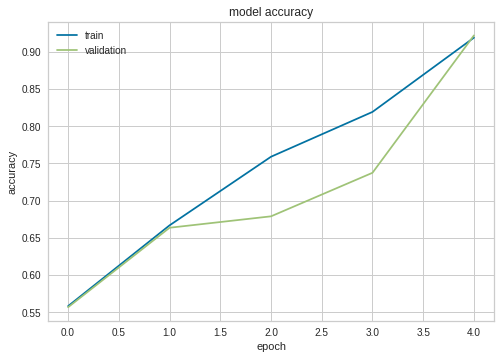

In [34]:
# summarize history for accuracy
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()